In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
import pickle

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
dataset = pd.read_csv('mail_data.csv')

In [ ]:
print(dataset)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
data = dataset.where((pd.notnull(dataset)), '')

In [ ]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.shape

(5572, 2)

In [ ]:
encoder = LabelEncoder()

In [ ]:
data['Category'].value_counts()

1    4825
0     747
Name: Category, dtype: int64

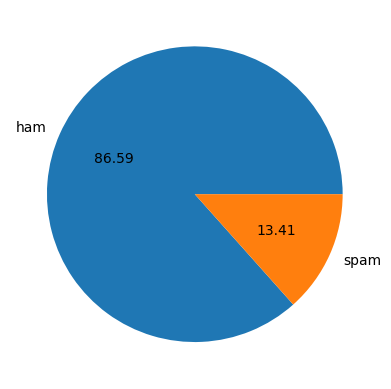

In [ ]:
plt.pie(data['Category'].value_counts(), labels = ['ham', 'spam'], autopct = "%.2f")
plt.show()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['num_characters'] = data['Message'].apply(len)

In [ ]:
data.head()

,Category,Message,num_characters
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
data['num_words'] = data['Message'].apply(lambda x : len(nltk.word_tokenize(x)))

In [ ]:
data.head()

,Category,Message,num_characters,num_words
0,1,"Go until jurong point, crazy.. Available only ...",111,24
1,1,Ok lar... Joking wif u oni...,29,8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,1,U dun say so early hor... U c already then say...,49,13
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
data['num_sentences'] = data['Message'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [ ]:
data.head()

,Category,Message,num_characters,num_words,num_sentences
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
data[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.368988,18.826992,2.004666
std,59.926946,13.853616,1.539516
min,2.000000,1.000000,1.000000
25%,35.750000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,122.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Valid Email Data
data[data['Category'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.448290,17.425699,1.846010
std,58.434864,14.118631,1.475377
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Spam Email Data

data[data['Category'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,137.989290,27.878179,3.029451
std,29.980287,7.036282,1.552198
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

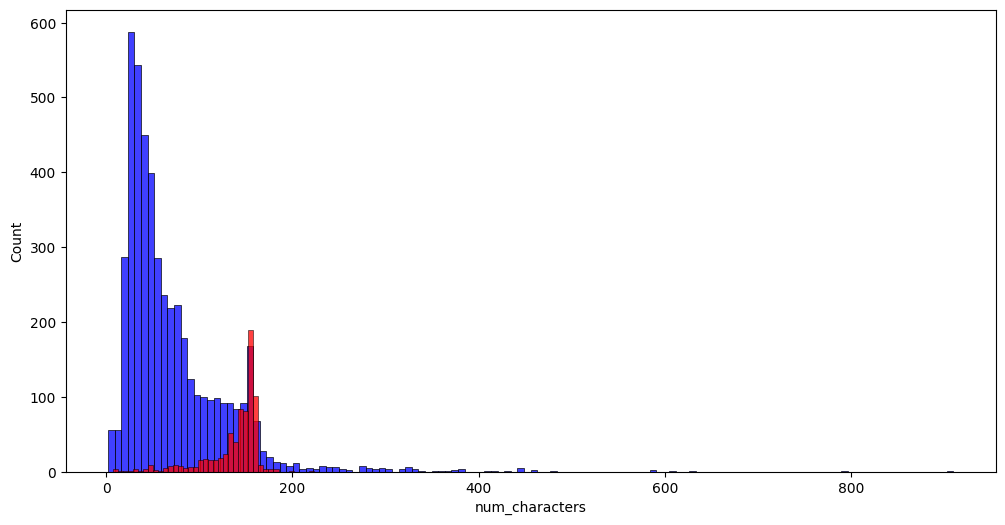

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(data[data['Category'] == 1]['num_characters'], color = 'blue')
sns.histplot(data[data['Category'] == 0]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

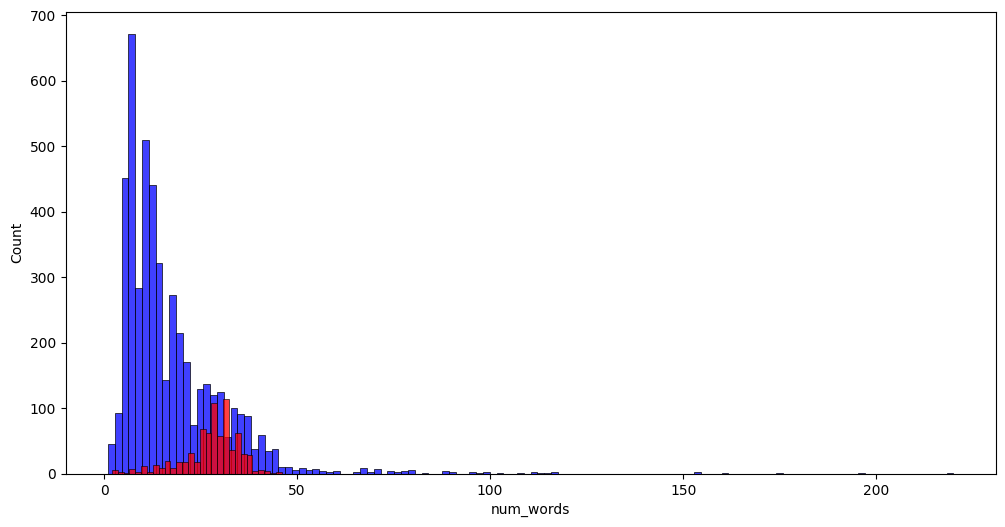

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(data[data['Category'] == 1]['num_words'], color = 'blue')
sns.histplot(data[data['Category'] == 0]['num_words'], color = 'red')

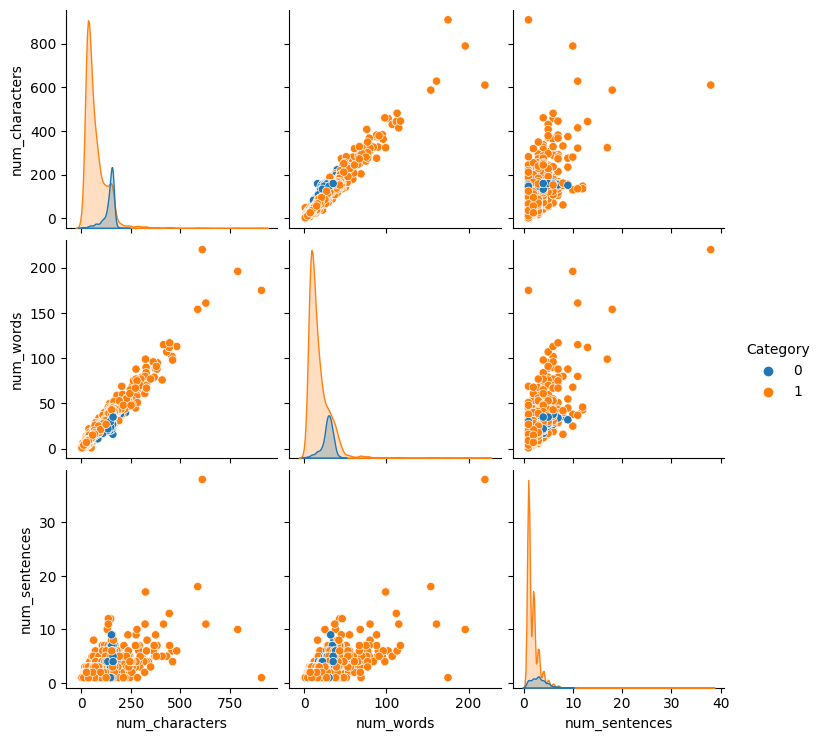

In [ ]:
sns.pairplot(data, hue = 'Category')

<ipython-input-67-1f756df288d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

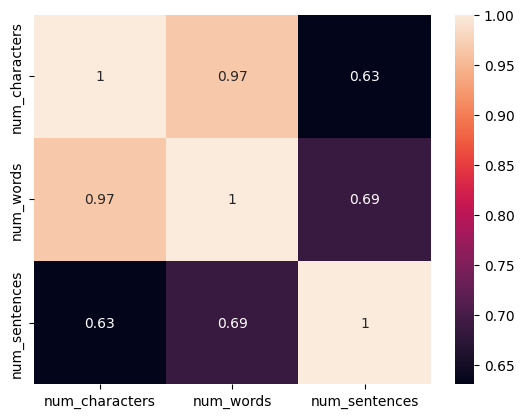

In [ ]:
sns.heatmap(data.corr(), annot = True)

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
ps = PorterStemmer()

In [ ]:
transform_text("Google LLC is an American multinational technology company focusing on artificial intelligence,[9] online advertising, search engine technology, cloud computing, computer software, quantum computing, e-commerce, and consumer electronics.")

'googl llc american multin technolog compani focus artifici intellig 9 onlin advertis search engin technolog cloud comput comput softwar quantum comput consum electron'

In [ ]:
data['transformed'] = data['Message'].apply(transform_text)

In [ ]:
data.head()

,Category,Message,num_characters,num_words,num_sentences,transformed
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [ ]:
spam_wc = wc.generate(data[data['Category'] == 0]['transformed'].str.cat(sep = " "))

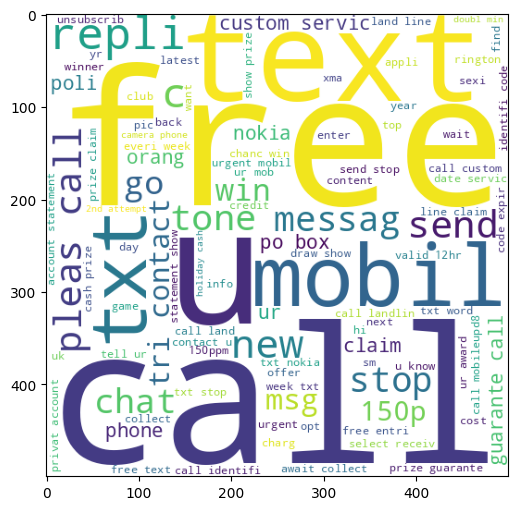

In [ ]:
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(data[data['Category'] == 1]['transformed'].str.cat(sep = " "))

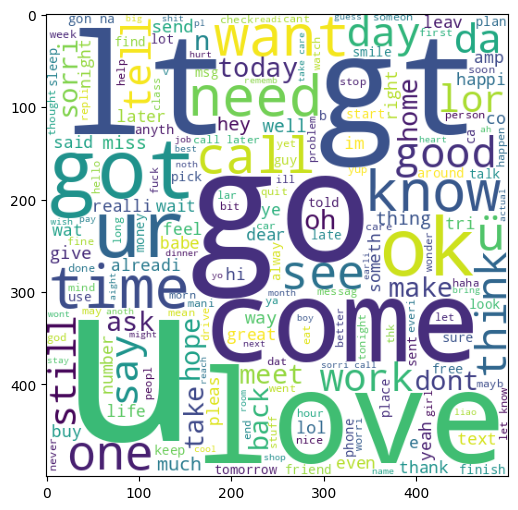

In [ ]:
plt.figure(figsize = (15, 6))
plt.imshow(ham_wc)

In [ ]:
data.head()

,Category,Message,num_characters,num_words,num_sentences,transformed
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in data[data['Category'] == 0]['transformed'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

11506

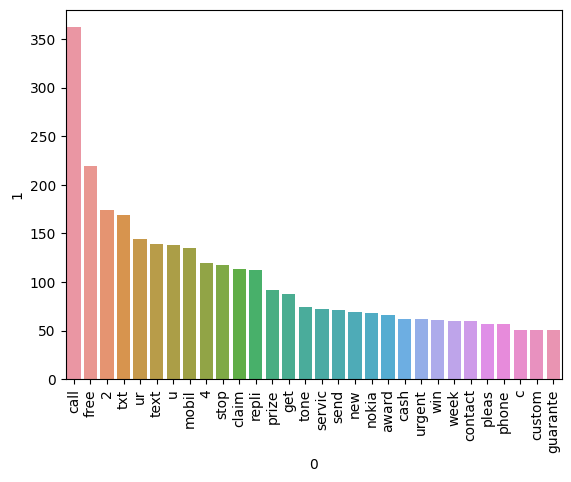

In [ ]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in data[data['Category'] == 1]['transformed'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

38819

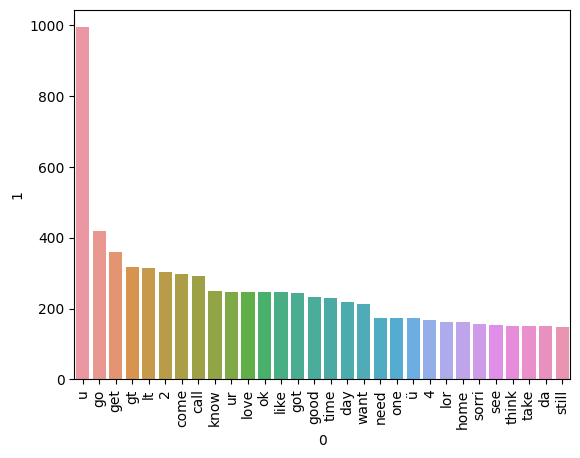

In [ ]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
data.head()

,Category,Message,num_characters,num_words,num_sentences,transformed
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
cv = CountVectorizer()
tv = TfidfVectorizer(max_features = 3000)

In [ ]:
X = tv.fit_transform(data['transformed']).toarray()

In [ ]:
X.shape

(5572, 3000)

In [ ]:
Y = data['Category'].values

In [ ]:
Y = Y.astype('int')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, Y_train)
Y_Pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, Y_Pred1))
print(confusion_matrix(Y_test, Y_Pred1))
print(precision_score(Y_test, Y_Pred1))

0.8511210762331839
[[131  27]
 [139 818]]
0.9680473372781065


In [ ]:
mnb.fit(X_train, Y_train)
Y_Pred2 = gnb.predict(X_test)
print(accuracy_score(Y_test, Y_Pred2))
print(confusion_matrix(Y_test, Y_Pred2))
print(precision_score(Y_test, Y_Pred2))

0.8511210762331839
[[131  27]
 [139 818]]
0.9680473372781065


In [ ]:
bnb.fit(X_train, Y_train)
Y_Pred3 = gnb.predict(X_test)
print(accuracy_score(Y_test, Y_Pred3))
print(confusion_matrix(Y_test, Y_Pred3))
print(precision_score(Y_test, Y_Pred3))

0.8511210762331839
[[131  27]
 [139 818]]
0.9680473372781065


In [ ]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state = 2)
xgb = XGBClassifier(n_estimators = 50,random_state = 2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy, precision

In [ ]:
train_classifier(svc, X_train, Y_train, X_test, Y_test)

(0.9713004484304932, 0.9714576962283384)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)

    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For:  SVC
Accuracy:  0.9713004484304932
Precision:  0.9714576962283384
For:  KN
Accuracy:  0.9049327354260089
Precision:  0.9002822201317028
For:  NB
Accuracy:  0.9704035874439462
Precision:  0.9666666666666667
For:  DT
Accuracy:  0.9273542600896861
Precision:  0.9406438631790744
For:  LR
Accuracy:  0.9551569506726457
Precision:  0.9557788944723619
For:  RF
Accuracy:  0.9704035874439462
Precision:  0.9685598377281948
For:  AdaBoost
Accuracy:  0.957847533632287
Precision:  0.9633401221995926
For:  BgC
Accuracy:  0.9623318385650225
Precision:  0.9750778816199377
For:  ETC
Accuracy:  0.9748878923766816
Precision:  0.9734964322120285
For:  GBDT
Accuracy:  0.9533632286995516
Precision:  0.9538615847542627
For:  xgb
Accuracy:  0.9659192825112107
Precision:  0.9683995922528033


In [ ]:
performance_data = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending = False)

In [ ]:
performance_data

,Algorithm,Accuracy,Precision
7,BgC,0.962332,0.975078
8,ETC,0.974888,0.973496
0,SVC,0.971300,0.971458
5,RF,0.970404,0.968560
10,xgb,0.965919,0.968400
2,NB,0.970404,0.966667
6,AdaBoost,0.957848,0.963340
4,LR,0.955157,0.955779
9,GBDT,0.953363,0.953862
3,DT,0.927354,0.940644


In [ ]:
performance_data1 = pd.melt(performance_data, id_vars = "Algorithm")

In [ ]:
performance_data1

,Algorithm,variable,value
0,BgC,Accuracy,0.962332
1,ETC,Accuracy,0.974888
2,SVC,Accuracy,0.971300
3,RF,Accuracy,0.970404
4,xgb,Accuracy,0.965919
5,NB,Accuracy,0.970404
6,AdaBoost,Accuracy,0.957848
7,LR,Accuracy,0.955157
8,GBDT,Accuracy,0.953363
9,DT,Accuracy,0.927354


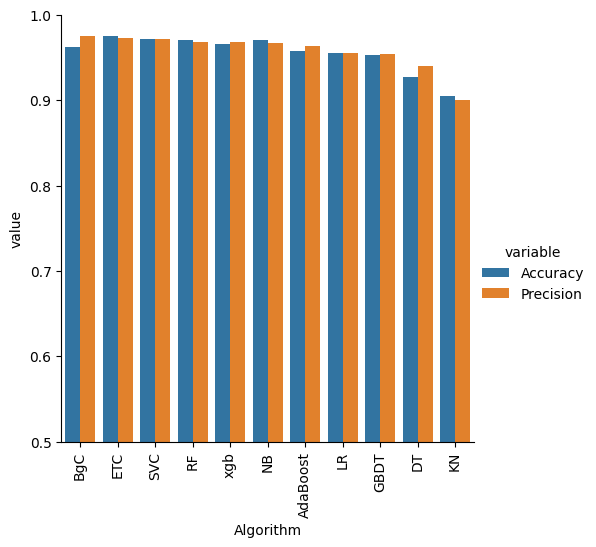

In [ ]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_data1, kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation  = 'vertical')
plt.show()

In [ ]:
temp_data = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_max_ft_3000' : accuracy_scores, 'Precision_max_ft_3000' : precision_scores}).sort_values('Precision_max_ft_3000', ascending = False)

In [ ]:
temp_data = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_scaling' : accuracy_scores, 'Precision_scaling' : precision_scores}).sort_values('Precision_scaling', ascending = False)

In [ ]:
new_data = performance_data.merge(temp_data, on = 'Algorithm')

In [ ]:
new_data_scaled = new_data.merge(temp_data, on = 'Algorithm')

In [ ]:
temp_data = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_num_chars' : accuracy_scores, 'Precision_num_chars' : precision_scores}).sort_values('Precision_num_chars', ascending = False)

In [ ]:
new_data_scaled.merge(temp_data, on = "Algorithm")

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,BgC,0.962332,0.975078,0.962332,0.975078,0.962332,0.975078,0.962332,0.975078
1,ETC,0.974888,0.973496,0.974888,0.973496,0.974888,0.973496,0.974888,0.973496
2,SVC,0.971300,0.971458,0.971300,0.971458,0.971300,0.971458,0.971300,0.971458
3,RF,0.970404,0.968560,0.970404,0.968560,0.970404,0.968560,0.970404,0.968560
4,xgb,0.965919,0.968400,0.965919,0.968400,0.965919,0.968400,0.965919,0.968400
5,NB,0.970404,0.966667,0.970404,0.966667,0.970404,0.966667,0.970404,0.966667
6,AdaBoost,0.957848,0.963340,0.957848,0.963340,0.957848,0.963340,0.957848,0.963340
7,LR,0.955157,0.955779,0.955157,0.955779,0.955157,0.955779,0.955157,0.955779
8,GBDT,0.953363,0.953862,0.953363,0.953862,0.953363,0.953862,0.953363,0.953862
9,DT,0.927354,0.940644,0.927354,0.940644,0.927354,0.940644,0.927354,0.940644


In [ ]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

In [ ]:
voting = VotingClassifier(estimators = [('svm', svc), ('nb', mnb), ('et', etc)], voting = 'soft')

In [ ]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
Y_Pred = voting.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, Y_Pred))
print("Precision: ", precision_score(Y_test, Y_Pred))

Accuracy:  0.9757847533632287
Precision:  0.9725609756097561


In [ ]:
clf = StackingClassifier(estimators = [('svm', svc), ('nb', mnb), ('et', etc)], final_estimator = RandomForestClassifier())

In [ ]:
clf.fit(X_train, Y_train)
Y_Pred = clf.predict(X_test)
print("Accuracy", accuracy_score(Y_test, Y_Pred))
print("Precision", precision_score(Y_test, Y_Pred))

Accuracy 0.9802690582959641
Precision 0.9785056294779939


In [ ]:
pickle.dump(tv, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))